In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
data = pd.read_csv('Dataset.csv')
print(data.head())

                        Date        Open        High         Low       Close  \
0  2025-07-03 00:00:00-04:00    6.630000    6.740000    6.615000    6.640000   
1  2025-07-03 00:00:00-04:00  106.750000  108.370003  106.330101  107.339996   
2  2025-07-03 00:00:00-04:00  122.629997  123.050003  121.550003  121.930000   
3  2025-07-03 00:00:00-04:00  221.705002  224.009995  221.360001  223.410004   
4  2025-07-03 00:00:00-04:00  212.145004  214.649994  211.810104  213.550003   

     Volume Brand_Name Ticker Industry_Tag  Country  Dividends  Stock Splits  \
0   4209664    peloton   PTON      fitness      usa        0.0           0.0   
1    560190      crocs   CROX     footwear      usa        0.0           0.0   
2     36600     adidas  ADDYY      apparel  germany        0.0           0.0   
3  29295154     amazon   AMZN   e-commerce      usa        0.0           0.0   
4  34697317      apple   AAPL   technology      usa        0.0           0.0   

   Capital Gains  
0            NaN  


In [3]:
print("\nUnique companies:")
print(data['Brand_Name'].unique())


Unique companies:
['peloton' 'crocs' 'adidas' 'amazon' 'apple' 'nike' 'target' 'google'
 'spotify' 'zoom video communications' 'the walt disney company' 'roblox'
 'delta air lines' 'costco' 'southwest airlines'
 'american eagle outfitters' 'tesla' 'starbucks' 'nvidia'
 'salesforce / slack' 'honda' 'colgate palmolive' 'hershey company'
 'chipotle' 'pinterest' 'logitech' 'shopify' 'amd' 'american express'
 'coinbase' 'mastercard' "mcdonald's" 'adobe' 'unilever' 'cisco'
 'jpmorgan chase & co' 'airbnb' 'marriott' 'toyota' 'hilton'
 'the home depot' 'johnson & johnson' 'uber' 'procter & gamble' 'fedex'
 '3m' 'philips' 'foot locker' 'the coca-cola company' 'microsoft' 'visa'
 'lvmh' 'zoominfo' 'ubisoft' 'netflix' 'puma' 'nintendo' 'bmw group'
 'porsche' 'twitter' 'nordstrom' 'block']


In [4]:
print("\nUnique companies:")
print(data['Country'].unique())


Unique companies:
['usa' 'germany' 'japan' 'switzerland' 'canada' 'netherlands' 'france']


In [5]:
print("\nUnique companies:")
print(data['Ticker'].unique())


Unique companies:
['PTON' 'CROX' 'ADDYY' 'AMZN' 'AAPL' 'NKE' 'TGT' 'GOOGL' 'SPOT' 'ZM' 'DIS'
 'RBLX' 'DAL' 'COST' 'LUV' 'AEO' 'TSLA' 'SBUX' 'NVDA' 'CRM' 'HMC' 'CL'
 'HSY' 'CMG' 'PINS' 'LOGI' 'SHOP' 'AMD' 'AXP' 'COIN' 'MA' 'MCD' 'ADBE'
 'UL' 'CSCO' 'JPM' 'ABNB' 'MAR' 'TM' 'HLT' 'HD' 'JNJ' 'UBER' 'PG' 'FDX'
 'MMM' 'PHG' 'FL' 'KO' 'MSFT' 'V' 'LVMUY' 'ZI' 'UBSFY' 'NFLX' 'PMMAF'
 'NTDOY' 'BAMXF' 'POAHY' 'TWTR' 'JWN' 'SQ']


In [8]:
print(data['Brand_Name'].nunique())
print(data['Ticker'].nunique())

62
62


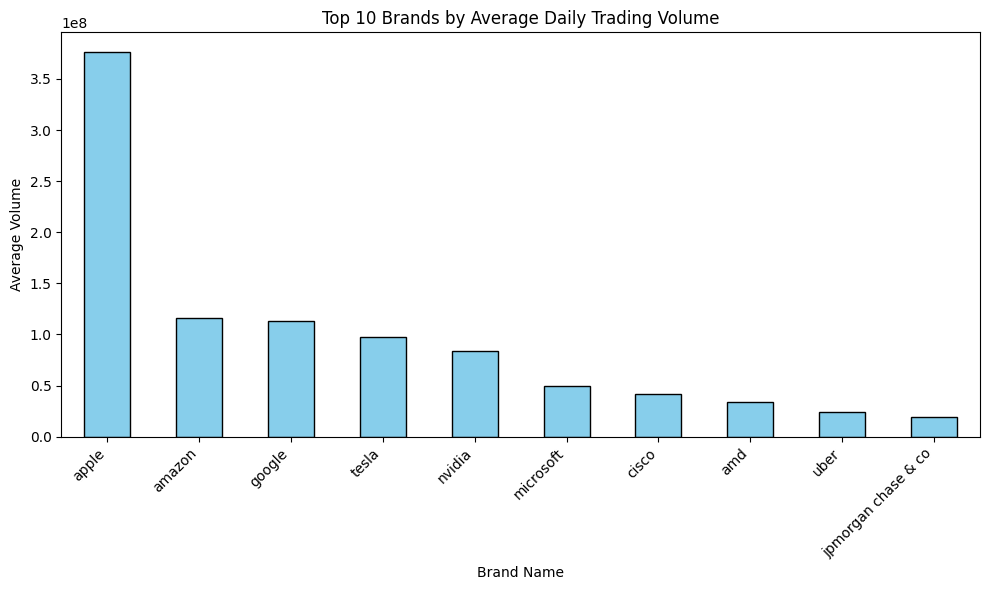

In [10]:
volume_df = data.groupby('Brand_Name')['Volume'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
volume_df.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Brands by Average Daily Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Brand Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(60, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # output: next day's Close price
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Filter Apple stock (AAPL)
apple_data = data[data['Ticker'] == 'AAPL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only the 'Close' price for prediction
close_prices = apple_data[['Close']].values

# Normalize data (scale between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences (60 days -> next day)
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # past 60 days
    y.append(scaled_data[i, 0])               # next day
X, y = np.array(X), np.array(y)

# Reshape X for LSTM: (samples, time_steps, features=1)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X.shape, y.shape

C:\Users\me\AppData\Local\Temp\ipykernel_4700\937549235.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])


((6410, 60, 1), (6410,))

C:\Users\me\AppData\Local\Temp\ipykernel_4700\3200627708.py:17: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  apple_data['Date'] = pd.to_datetime(apple_data['Date'])
c:\Users\me\test-practice-others\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 2.2669e-04 - val_loss: 5.0945e-04
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 3.3110e-05 - val_loss: 2.7103e-04
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 2.9187e-05 - val_loss: 2.2302e-04
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 2.3772e-05 - val_loss: 1.5685e-04
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 2.2576e-05 - val_loss: 1.3261e-04
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 2.2230e-05 - val_loss: 1.5939e-04
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 2.3037e-05 - val_loss: 1.7276e-04
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 1.9248e-05 - val_loss: 1.1188e-04
Epoch 9/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 1.9463e-05 - val_loss: 1.3711e-04
Epoch 10/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 1.9593e-05 - val_loss: 1.2216e-04
Epoch 11/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 

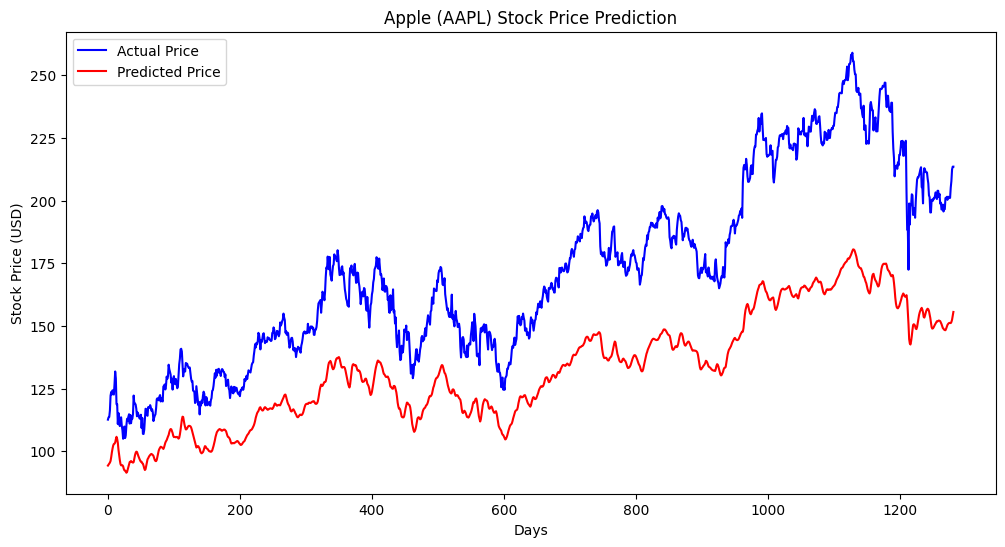

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# =====================
# 1. Load & preprocess
# =====================
df = pd.read_csv("Dataset.csv")

# Filter Apple stock (AAPL)
apple_data = df[df['Ticker'] == 'AAPL'].copy()

# Convert Date to datetime and sort
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data = apple_data.sort_values('Date')

# Use only the 'Close' price
close_prices = apple_data[['Close']].values

# Normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# =====================
# 2. Create sequences
# =====================
time_steps = 60
X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # past 60 days
    y.append(scaled_data[i, 0])               # next day
X, y = np.array(X), np.array(y)

# Reshape for LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# =====================
# 3. Train-Test Split
# =====================
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# =====================
# 4. Build LSTM Model
# =====================
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# =====================
# 5. Train Model
# =====================
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_split=0.1, 
                    verbose=1)

# =====================
# 6. Predictions
# =====================
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))

# Inverse scaling for actual values
actual = scaler.inverse_transform(y_test.reshape(-1,1))

# =====================
# 7. Visualization
# =====================
plt.figure(figsize=(12,6))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Apple (AAPL) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()